## ARIMA-model

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

In [2]:
var_set = pd.read_csv('var_set.csv', parse_dates=[0],index_col=[0])

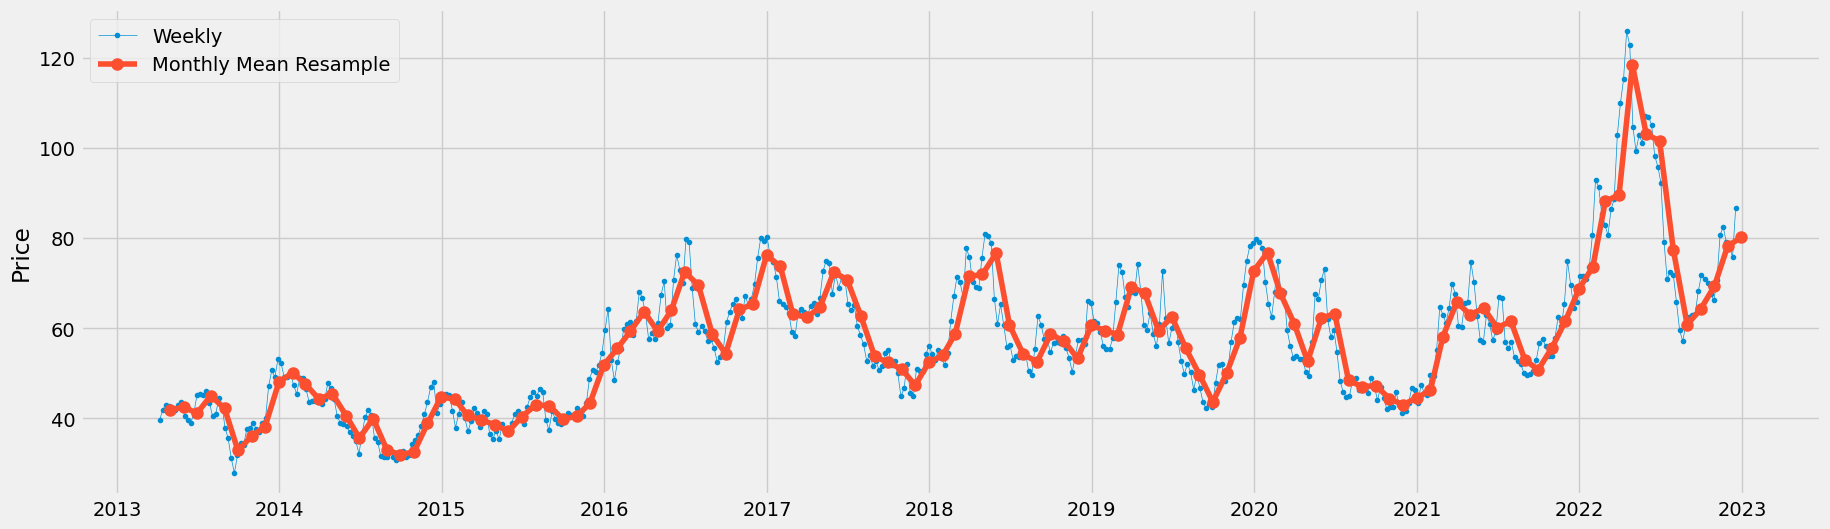

In [4]:
y = var_set['SalmonPrice']
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(y,marker='.', linestyle='-', linewidth=0.5, label='Weekly')
ax.plot(y.resample('M').mean(),marker='o', markersize=8, linestyle='-', label='Monthly Mean Resample')
ax.set_ylabel('Price')
ax.legend();
plt.savefig('Figures/ARIMA/MonthlyMeanPlot.png')

In [5]:
var_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 507 entries, 2013-04-07 to 2022-12-18
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SalmonPrice   507 non-null    float64
 1   CodPrice      507 non-null    float64
 2   HalibutPrice  507 non-null    float64
 3   CPI           507 non-null    float64
dtypes: float64(4)
memory usage: 19.8 KB


In [20]:
dftest1 = adfuller(var_set.SalmonPrice, autolag="AIC") 

#print(dftest1)
siglevel = dftest1[1]

if dftest1[1] < 0.05:
  print("Salmon price is stationary.")
else:
  print("Sig-level is:",siglevel.round(5),"\nSalmon price is not stationary at a 5% sig-level.")

Sig-level is: 0.05651 
Salmon price is not stationary at a 5% sig-level.


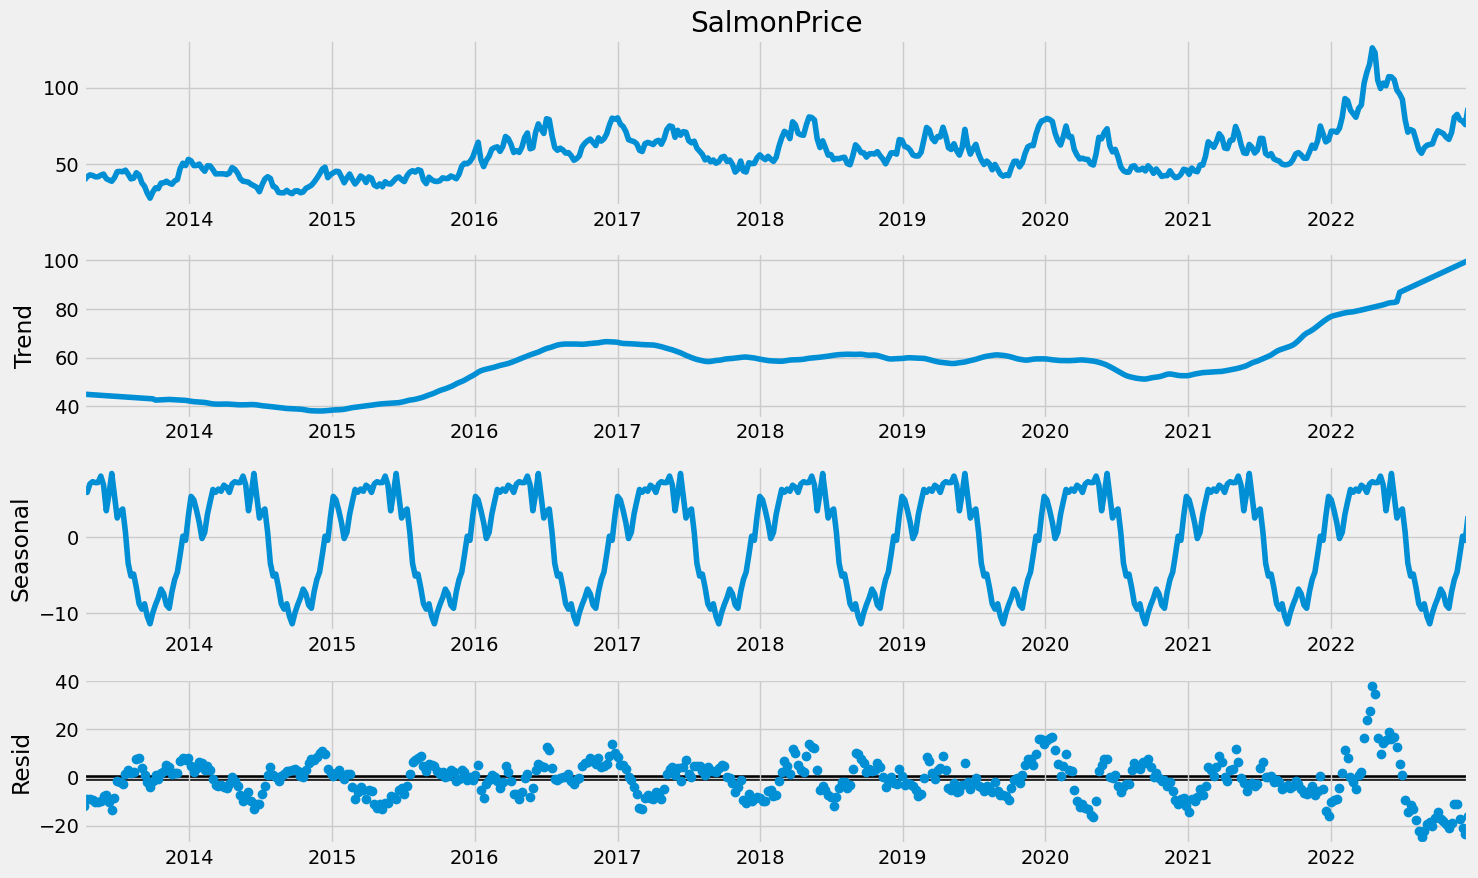

In [33]:
decomposition = sm.tsa.seasonal_decompose(var_set["SalmonPrice"], model='additive',extrapolate_trend='freq')
#fig.set_linewidth(0.1)
fig = decomposition.plot()
fig.set_size_inches(15,9)
fig.tight_layout()
plt.savefig('Figures/ARIMA/Decomposition.png')
plt.show()

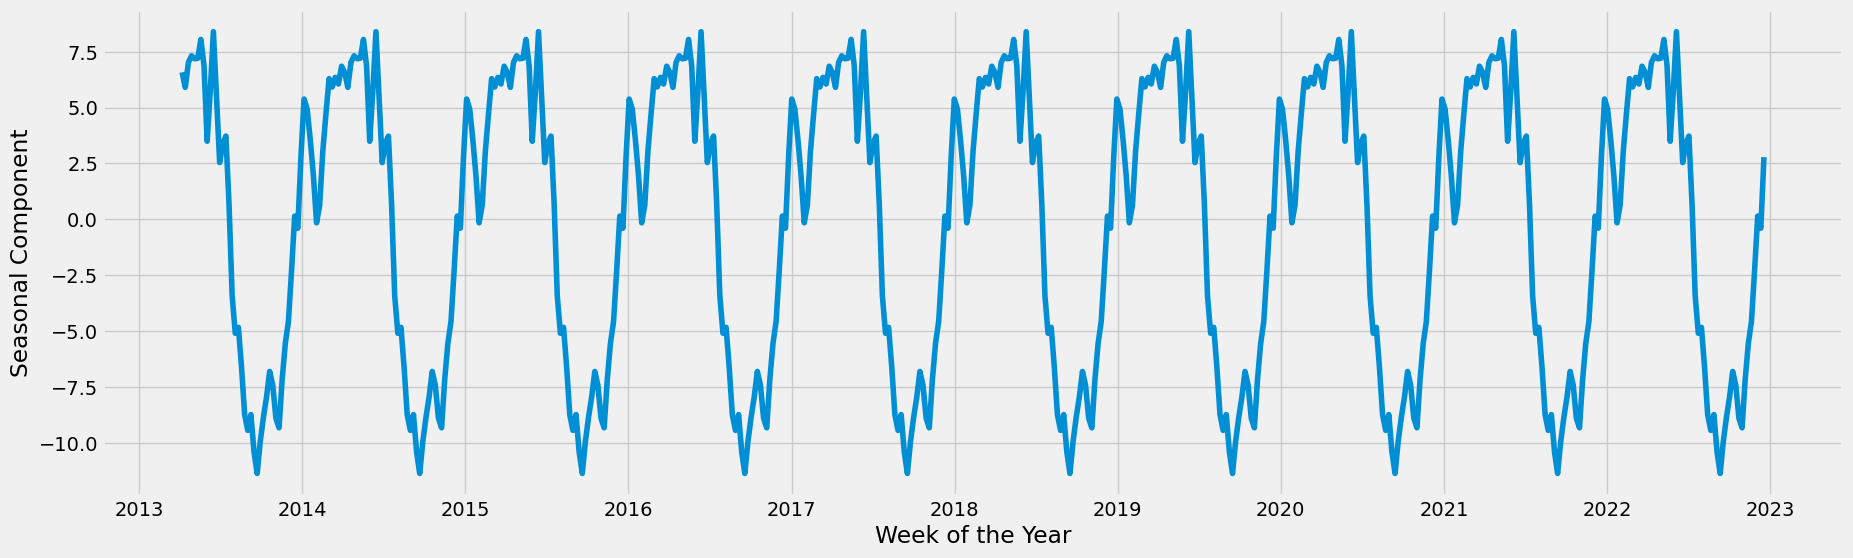

In [40]:
#seasonal = decomposition.seasonal
fig, ax = plt.subplots(figsize=(20,6))
ax.plot(decomposition.seasonal)
ax.set_xlabel('Week of the Year')
ax.set_ylabel('Seasonal Component')
plt.savefig('Figures/ARIMA/SeasonalDecompose.png')
plt.show()

In [24]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

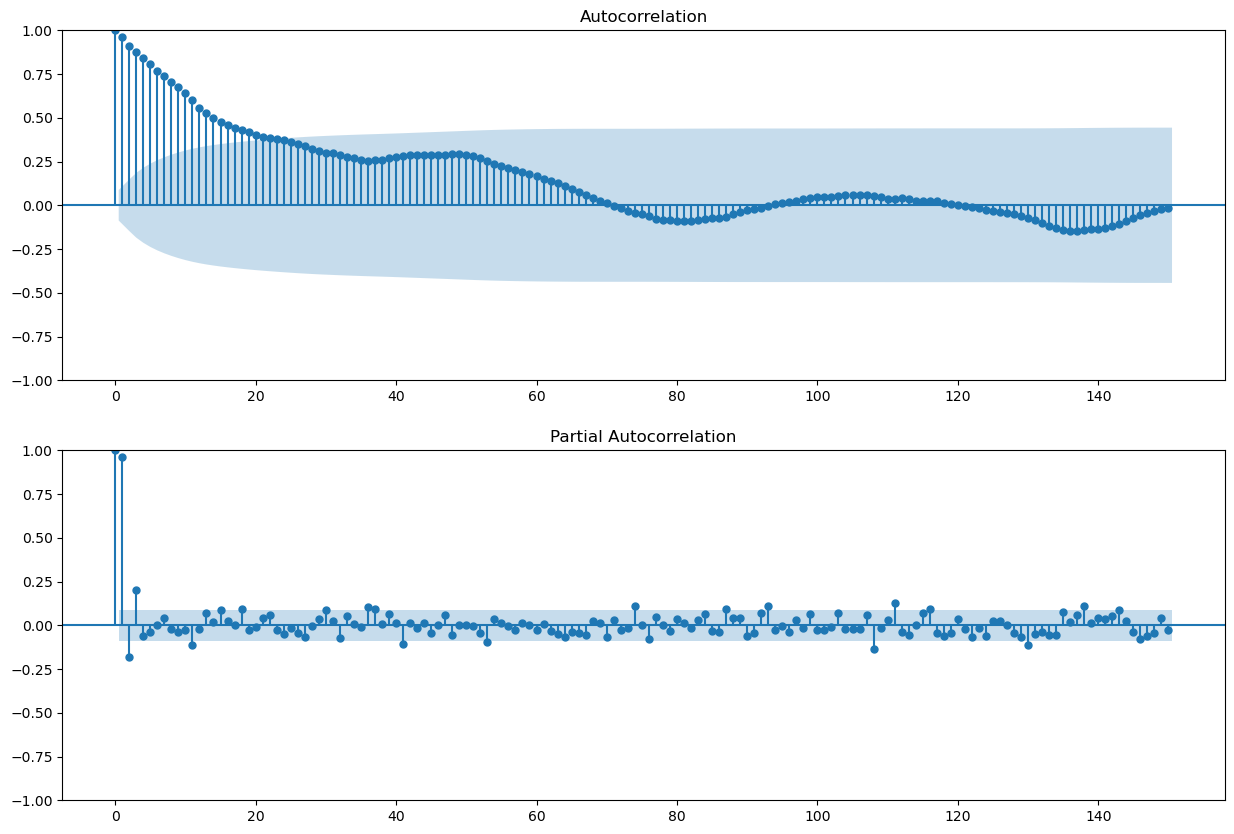

In [33]:
fig, ax = plt.subplots(2,1, figsize=(15,10))
plot_acf(var_set.SalmonPrice, ax=ax[0], lags=150)
plot_pacf(var_set.SalmonPrice, ax=ax[1], lags=150)

plt.savefig('Figures/ARIMA/OriginalACF-PACF.png')
plt.show()

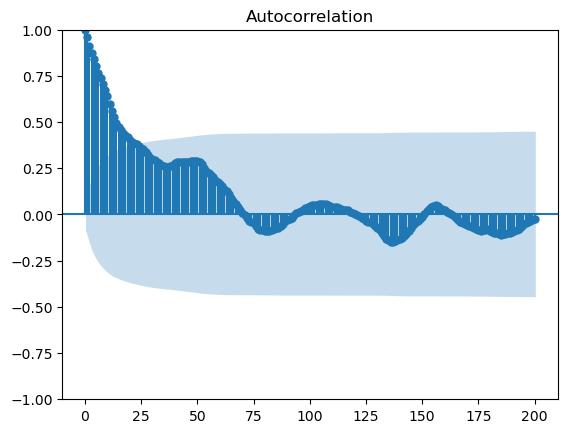

In [29]:

plot_acf(var_set.SalmonPrice, lags=200)

plt.show()